In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import folium

In [2]:
import re #정규표현식

In [3]:
# 폰트 설정
plt.rc('font',family="Malgun Gothic")

In [4]:
data = pd.read_csv("C:/Users/joyh1/Desktop/DSC/Inflearn강의자료/데이터분석/data/전국도시공원표준데이터.csv", encoding='euc-kr')

In [5]:
data.shape

(18137, 20)

In [6]:
data.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [8]:
data.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [9]:
data.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [10]:
no_columns = ['관리번호','공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
'공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
'Unnamed: 19']

park = data.drop(columns=no_columns)
park.head(1)

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적
0,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


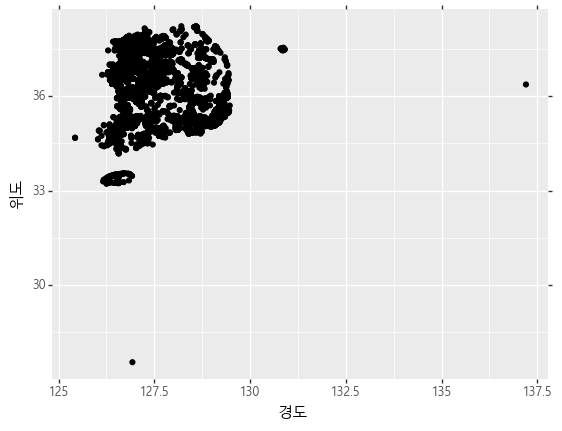

<ggplot: (182824014456)>

In [11]:
(ggplot(park)
 +aes(x='경도', y='위도')
 +geom_point()
 +theme(text=element_text(family="Malgun Gothic"))
)

## 데이터 전처리 

In [12]:
park.head(2)

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적
0,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0
1,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0


In [13]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   공원명       18137 non-null  object 
 1   공원구분      18137 non-null  object 
 2   소재지도로명주소  8039 non-null   object 
 3   소재지지번주소   17158 non-null  object 
 4   위도        18137 non-null  float64
 5   경도        18137 non-null  float64
 6   공원면적      18137 non-null  float64
dtypes: float64(3), object(4)
memory usage: 992.0+ KB


In [14]:
                                                # x= 앞의변수인자, : 뒤에는 return
park['공원면적비율'] = park['공원면적'].apply(lambda x : np.sqrt(x)*0.01)
park.head(2)

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율
0,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,0.955877
1,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,1.837281


In [15]:
park['소재지도로명주소'].isnull().sum()

10098

In [16]:
park['소재지지번주소'].isnull().sum()

979

In [17]:
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())].shape

(10098, 8)

In [18]:
park.loc[(park['소재지지번주소'].isnull()) & (park['소재지도로명주소'].isnull())].shape

(0, 8)

In [19]:
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace=True)

In [20]:
park['소재지지번주소'].fillna(park['소재지도로명주소'], inplace=True)

In [21]:
park['소재지도로명주소'].isnull().sum()

0

In [22]:
park['소재지지번주소'].isnull().sum()

0

In [23]:
park.head(2)

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율
0,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,0.955877
1,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,1.837281


In [24]:
park['시도'] = park['소재지도로명주소'].str.split(" ", expand=True)[0]
park['구군'] = park['소재지도로명주소'].str.split(" ", expand=True)[1]
park.head(2)

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,구군
0,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,0.955877,부산광역시,강서구
1,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,1.837281,부산광역시,강서구


In [25]:
# 전체 데이터에서 이상치(Outliner)들 제거 해주자
park['시도'].isnull().sum()

0

In [26]:
park_notnull = park.loc[(park['위도'] > 30) & (park['경도'] < 135)]

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


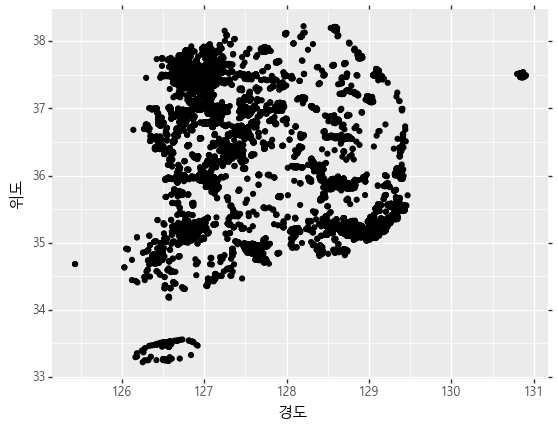

<ggplot: (158136870334)>

In [62]:
(ggplot(park_notnull)
 +aes(x='경도', y='위도')
 +geom_point()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [27]:
park_notnull['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1744
충청남도       1723
전라북도       1137
경상북도        917
충청북도        898
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [28]:
# 대전의 데이터들만 갖고오자

park_daejeon = park_notnull.loc[park_notnull['시도'] == '대전광역시']
park_daejeon.shape

(497, 10)

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


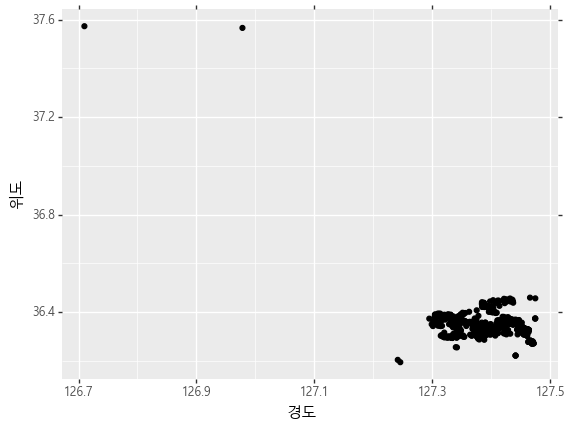

<ggplot: (158138802524)>

In [65]:
(ggplot(park_daejeon)
 +aes(x='경도', y='위도')
 +geom_point()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [29]:
# 대전 데이터에서도 이상치 제거
park_daejeon = park_daejeon.loc[(park_daejeon['위도'] < 36.8) & (park_daejeon['경도'] > 127.1)]

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


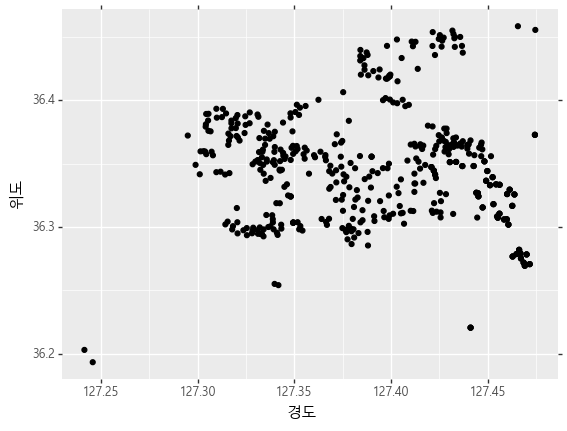

<ggplot: (158141896554)>

In [67]:
(ggplot(park_daejeon)
 +aes(x='경도', y='위도')
 +geom_point()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [30]:
park_daejeon = park_daejeon.loc[park_daejeon['경도'] > 127.25]

In [31]:
park_daejeon.head()

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,구군
778,덕명,어린이공원,대전광역시 유성구 덕명동 512,대전광역시 유성구 덕명동 512,36.359747,127.301445,5683.7,0.753903,대전광역시,유성구
779,대전노은2(지울),소공원,"대전광역시 유성구 은구비로146번길 24, (죽동)",대전광역시 유성구 죽동 608-1,36.381927,127.326849,1800.2,0.424288,대전광역시,유성구
780,문지,어린이공원,대전광역시 유성구 문지동 246,대전광역시 유성구 문지동 246,36.395412,127.407375,1501.3,0.387466,대전광역시,유성구
781,강변,어린이공원,대전광역시 유성구 전민동 249-4,대전광역시 유성구 전민동 249-4,36.396476,127.409218,3255.7,0.570587,대전광역시,유성구
782,추목천,소공원,대전광역시 유성구 장동 24-7,대전광역시 유성구 장동 24-7,36.395560,127.355805,831.0,0.288271,대전광역시,유성구


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


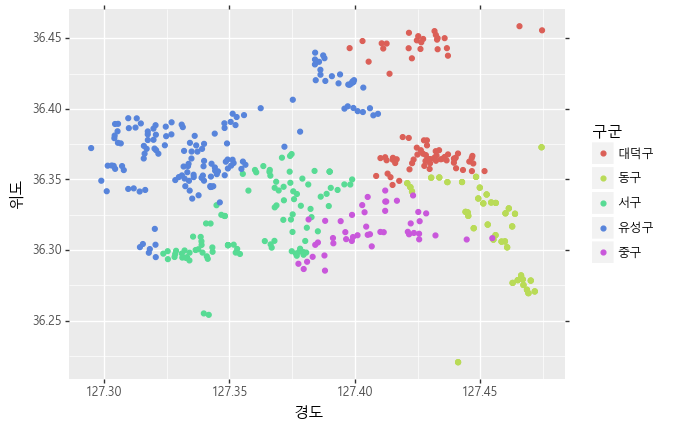

<ggplot: (158142020160)>

In [103]:
(ggplot(park_daejeon)
 +aes(x='경도', y='위도', color='구군')
 +geom_point()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [32]:
park_daejeon.head()

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,구군
778,덕명,어린이공원,대전광역시 유성구 덕명동 512,대전광역시 유성구 덕명동 512,36.359747,127.301445,5683.7,0.753903,대전광역시,유성구
779,대전노은2(지울),소공원,"대전광역시 유성구 은구비로146번길 24, (죽동)",대전광역시 유성구 죽동 608-1,36.381927,127.326849,1800.2,0.424288,대전광역시,유성구
780,문지,어린이공원,대전광역시 유성구 문지동 246,대전광역시 유성구 문지동 246,36.395412,127.407375,1501.3,0.387466,대전광역시,유성구
781,강변,어린이공원,대전광역시 유성구 전민동 249-4,대전광역시 유성구 전민동 249-4,36.396476,127.409218,3255.7,0.570587,대전광역시,유성구
782,추목천,소공원,대전광역시 유성구 장동 24-7,대전광역시 유성구 장동 24-7,36.395560,127.355805,831.0,0.288271,대전광역시,유성구


In [33]:
park_daejeon['구군'].value_counts()

유성구    144
동구     117
서구     107
대덕구     79
중구      46
Name: 구군, dtype: int64

In [34]:
park_gu = pd.DataFrame(park_daejeon['구군'].value_counts())

                                        # 구군별 있는 공원 갯수를 비율로 나타내줌! -> 비율 칼럼 새로 추가하기위함!
park_gu_normalize = pd.DataFrame(park_daejeon['구군'].value_counts(normalize=True))

In [35]:
park_gu_normalize

,구군
유성구,0.292089
동구,0.237323
서구,0.217039
대덕구,0.160243
중구,0.093306


In [36]:
park_gu

,구군
유성구,144
동구,117
서구,107
대덕구,79
중구,46


In [37]:
daejeon_gu = park_gu.merge(park_gu_normalize, left_index=True, right_index=True).reset_index()

In [38]:
daejeon_gu.columns = ['구군', '합계', '비율']
daejeon_gu

,구군,합계,비율
0,유성구,144,0.292089
1,동구,117,0.237323
2,서구,107,0.217039
3,대덕구,79,0.160243
4,중구,46,0.093306


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


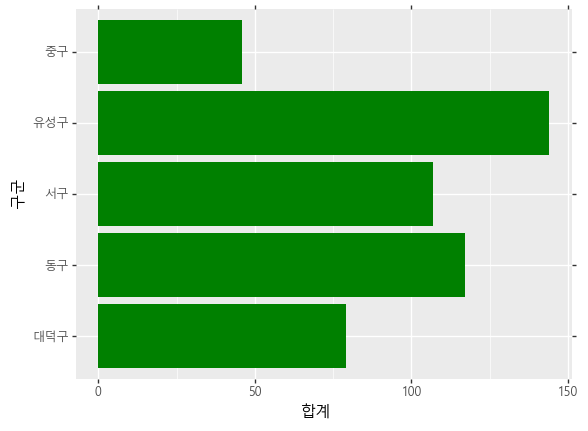

<ggplot: (182824018082)>

In [39]:
(ggplot(daejeon_gu.sort_values(by=['합계'], ascending=False))
 +aes(x='구군', y='합계')
 +geom_bar(stat='identity', position='dodge', fill='green')
 +coord_flip()
 +theme(text=element_text(family="Malgun Gothic"))
)
        

In [40]:
park_daejeon.shape

(493, 10)

In [41]:
park_daejeon.head(2)

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,구군
778,덕명,어린이공원,대전광역시 유성구 덕명동 512,대전광역시 유성구 덕명동 512,36.359747,127.301445,5683.7,0.753903,대전광역시,유성구
779,대전노은2(지울),소공원,"대전광역시 유성구 은구비로146번길 24, (죽동)",대전광역시 유성구 죽동 608-1,36.381927,127.326849,1800.2,0.424288,대전광역시,유성구


In [42]:
park_seogu = park_daejeon[park_daejeon['구군'] == '서구']
park_seogu.head(3)

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,구군
11378,사정,어린이공원,대전광역시 서구 월평로 24번길 39,대전광역시 서구 월평동 599,36.356767,127.366073,1779.3,0.421817,대전광역시,서구
11379,반달,어린이공원,대전광역시 서구 월평동 801,대전광역시 서구 월평동 801,36.355381,127.365931,1666.0,0.408167,대전광역시,서구
11380,섬말,어린이공원,대전광역시 서구 월평동 1046,대전광역시 서구 월평동 1046,36.355054,127.360678,1929.1,0.439215,대전광역시,서구


In [43]:
park_seogu = park_seogu.reset_index(drop=True)
park_seogu.head()

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,구군
0,사정,어린이공원,대전광역시 서구 월평로 24번길 39,대전광역시 서구 월평동 599,36.356767,127.366073,1779.3,0.421817,대전광역시,서구
1,반달,어린이공원,대전광역시 서구 월평동 801,대전광역시 서구 월평동 801,36.355381,127.365931,1666.0,0.408167,대전광역시,서구
2,섬말,어린이공원,대전광역시 서구 월평동 1046,대전광역시 서구 월평동 1046,36.355054,127.360678,1929.1,0.439215,대전광역시,서구
3,새뜸,어린이공원,대전광역시 서구 월평새뜸로4번길 49-26,대전광역시 서구 월평동 1308,36.353946,127.355318,2069.1,0.454874,대전광역시,서구
4,청산,어린이공원,대전광역시 서구 만년동 7,대전광역시 서구 만년동 7,36.367969,127.374785,2266.5,0.476078,대전광역시,서구


In [127]:
# 대전 서구에 있는 공원들만 folium 라이브러리를 이용해서 표시해보자
geo_df = park_seogu

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=13)

for n in geo_df.index:
    pop_name = geo_df.loc[n, '공원명']+"-"+geo_df.loc[n, '소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
                       radius=geo_df.loc[n, '공원면적비율'],
                       popup=pop_name,
                       color=icon_color,
                       fill=True,
                       fill_color=icon_color).add_to(map)
    
#pop up 한글 인코딩 깨지므로 html파일로 개별 저장
map.save("index.html")
map
    

In [46]:
park_daejeon.head()

,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,구군
778,덕명,어린이공원,대전광역시 유성구 덕명동 512,대전광역시 유성구 덕명동 512,36.359747,127.301445,5683.7,0.753903,대전광역시,유성구
779,대전노은2(지울),소공원,"대전광역시 유성구 은구비로146번길 24, (죽동)",대전광역시 유성구 죽동 608-1,36.381927,127.326849,1800.2,0.424288,대전광역시,유성구
780,문지,어린이공원,대전광역시 유성구 문지동 246,대전광역시 유성구 문지동 246,36.395412,127.407375,1501.3,0.387466,대전광역시,유성구
781,강변,어린이공원,대전광역시 유성구 전민동 249-4,대전광역시 유성구 전민동 249-4,36.396476,127.409218,3255.7,0.570587,대전광역시,유성구
782,추목천,소공원,대전광역시 유성구 장동 24-7,대전광역시 유성구 장동 24-7,36.395560,127.355805,831.0,0.288271,대전광역시,유성구
